In [8]:
from dataset import Dataset
import numpy as np
import pandas as pd
import vectorbt as vbt
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.simplefilter(action='ignore')


In [9]:
data_binance = Dataset().get_data(days=400, ticker='BTCUSDT', ts='6h')


In [10]:
data = data_binance.copy()


In [11]:
data['hour'] = data.index.hour
data['chg'] = data['close'].pct_change(1)
data['chg_volume'] = data['volume'].pct_change(1)
data['cuts_price'] = pd.cut(data['chg'], bins=5, labels=False)
data['cuts_volume'] = pd.cut(data['chg_volume'], bins=5, labels=False)


In [12]:
target_names = []
for i in range(1, 13):
    name = f'expected_chg_{i}'
    target_names.append(name)
    data[name] = data['close'].pct_change(i).shift(-i)


In [13]:
data\
    .groupby(['cuts_volume', 'cuts_price'])[target_names]\
    .agg(['sum'])


expected_chg_1 expected_chg_2 expected_chg_3  \
                                  sum            sum            sum   
cuts_volume cuts_price                                                
0.0         0.0              0.090643       0.109115       0.162873   
            1.0              0.341027       0.514057       0.681617   
            2.0              0.794808       1.459630       1.180083   
            3.0             -0.192806       0.051629       0.211270   
            4.0              0.030458      -0.020578      -0.042240   
1.0         0.0              0.006281       0.050456       0.196472   
            1.0             -0.031492      -0.047022       0.049922   
            2.0             -0.376316      -0.912414      -0.552582   
            3.0              0.248127       0.250910       0.373431   
            4.0             -0.034681      -0.074898      -0.095113   
2.0         0.0             -0.000449      -0.032775      -0.036853   
            1.0             -0.011799       0.101643       0.081128   
            2.0             -0.041995      -0.077890      -0.056717   
            3.0             -0.052532       0.041844       0.125384   
            4.0             -0.009655      -0.000791      -0.019191   
3.0         0.0             -0.040675      -0.007543       0.010452   
            1.0              0.001967       0.017714       0.011860   
            3.0              0.007637       0.036012       0.030031   
            4.0              0.053381       0.131955       0.089502   
4.0         2.0              0.015492       0.022473       0.015189   

                       expected_chg_4 expected_chg_5 expected_chg_6  \
                                  sum            sum            sum   
cuts_volume cuts_price                                                
0.0         0.0              0.149899       0.106698       0.044408   
            1.0              0.425438       0.263084      -0.127775   
            2.0              1.409345       1.959050       2.707204   
            3.0              0.435482       0.449876       0.547038   
            4.0             -0.057015      -0.055342      -0.118273   
1.0         0.0              0.249152       0.323295       0.330765   
            1.0              0.246328       0.127582       0.443926   
            2.0             -0.311126      -0.044551      -0.071628   
            3.0              0.353487       0.387961       0.476998   
            4.0             -0.090882      -0.074858      -0.074609   
2.0         0.0              0.043408       0.045437       0.014816   
            1.0              0.243402       0.357544       0.381308   
            2.0             -0.051920      -0.120843      -0.168256   
            3.0              0.053715       0.053199       0.094424   
            4.0             -0.013526      -0.000844      -0.011583   
3.0         0.0              0.016751       0.027681      -0.003590   
            1.0              0.014570      -0.011051       0.000082   
            3.0              0.009353       0.013815       0.020158   
            4.0              0.042538       0.068849       0.049265   
4.0         2.0              0.033133       0.037510       0.036933   

                       expected_chg_7 expected_chg_8 expected_chg_9  \
                                  sum            sum            sum   
cuts_volume cuts_price                                                
0.0         0.0             -0.097968      -0.105566      -0.161902   
            1.0             -0.075696       0.227769       0.660589   
            2.0              2.921813       3.398457       3.723939   
            3.0              0.480146       0.326090       0.488577   
            4.0             -0.134400      -0.118426      -0.087714   
1.0         0.0              0.320517       0.316271       0.325439   
            1.0              1.075370       1.236888       1.278232   
            2.0             -0.091178      -0

In [14]:
seq = "signal"
data.loc[:, 'signal'] = np.where(data['cuts_volume'] == 1, 1, -1)
stat_seq = data\
    .groupby([seq])[target_names]\
    .agg(['mean', 'min', 'max', 'median', 'sum', 'size'])

times = np.arange(1, 13)

fig = make_subplots(
    rows=3,
    cols=2,
    vertical_spacing=0.03
)

fig.add_trace(
    go.Bar(
        x=times,
        y=stat_seq.filter(like='median').loc[-1, :].values * 100,
        name="median",
        marker=dict(color="red")
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=times,
        y=stat_seq.filter(like='sum').loc[-1, :].values * 100,
        name="sum",
        marker=dict(color="red")
    ),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(
        x=times,
        y=stat_seq.filter(like='min').loc[-1, :].values * 100,
        name="min",
        marker=dict(color="red")
    ),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(
        x=times,
        y=stat_seq.filter(like='max').loc[-1, :].values * 100,
        name="max",
        marker=dict(color="red")
    ),
    row=3, col=1
)

###
fig.add_trace(
    go.Bar(
        x=times,
        y=stat_seq.filter(like='median').loc[1, :].values * 100,
        name="median",
        marker=dict(color="green")
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=times,
        y=stat_seq.filter(like='sum').loc[1, :].values * 100,
        name="sum",
        marker=dict(color="green")
    ),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(
        x=times,
        y=stat_seq.filter(like='min').loc[1, :].values * 100,
        name="min",
        marker=dict(color="green")
    ),
    row=3, col=2
)
fig.add_trace(
    go.Scatter(
        x=times,
        y=stat_seq.filter(like='max').loc[1, :].values * 100,
        name="max",
        marker=dict(color="green")
    ),
    row=3, col=2
)
fig.update_layout(title=f'{seq} %', height=800)
fig.show()


In [16]:
stat_seq.filter(like='mean')

,expected_chg_1,expected_chg_2,expected_chg_3,expected_chg_4,expected_chg_5,expected_chg_6,expected_chg_7,expected_chg_8,expected_chg_9,expected_chg_10,expected_chg_11,expected_chg_12
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
signal,,,,,,,,,,,,
-1,0.000817,0.001888,0.001985,0.002234,0.002591,0.002843,0.002936,0.003331,0.004286,0.004777,0.005265,0.005586
1,-0.000545,-0.002125,-0.000081,0.001296,0.002085,0.003204,0.004881,0.005350,0.003632,0.003534,0.003564,0.004326


<AxesSubplot:xlabel='time'>

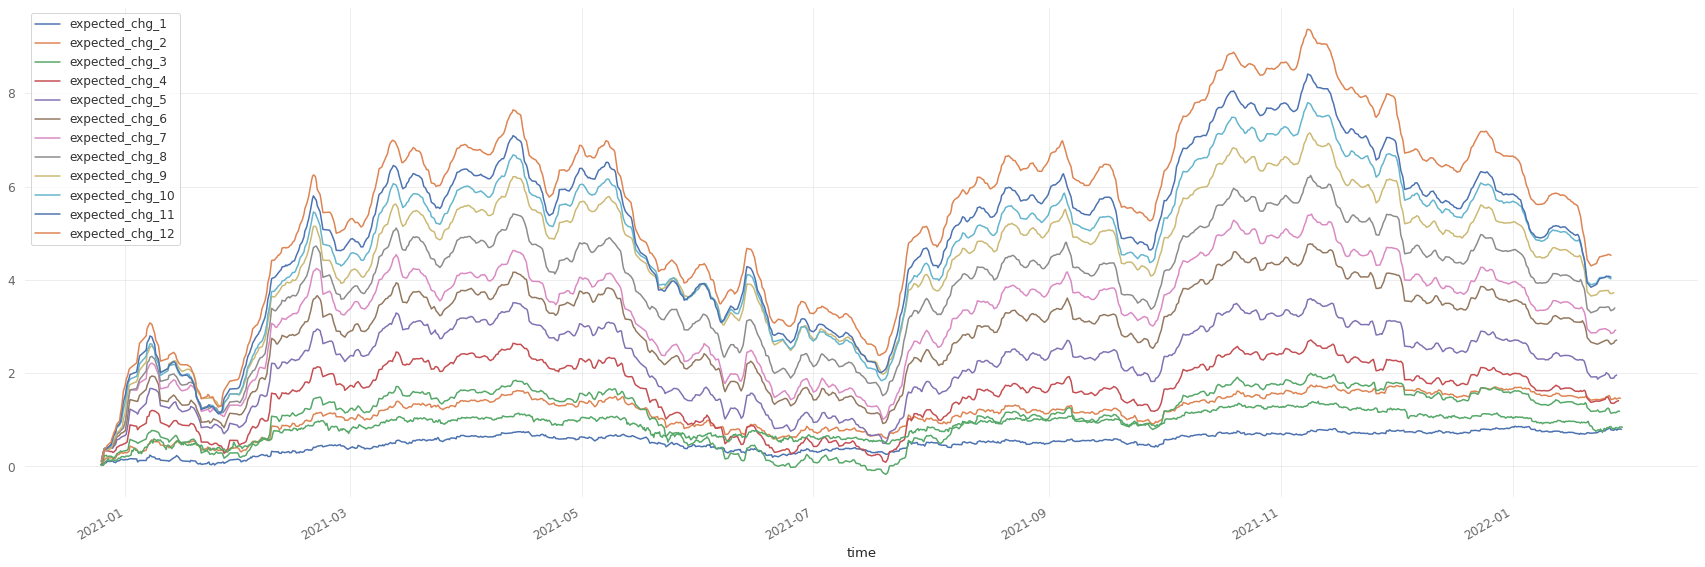

In [20]:
events = 'cuts_volume==0 & cuts_price==2'
data.query(events)[target_names
                   ].cumsum().plot(figsize=(30, 5))
data['chg'].cumsum().plot(figsize=(30, 10))


In [21]:
data\
    .groupby(['cuts_price', 'hour'])['expected_chg_1']\
    .agg(['sum', 'size'])\
    .unstack('hour')\
    .where(lambda x: x['size'] > 10)


sum                                         size          \
hour              0   1   4         6         12        18     0   1   4    
cuts_price                                                                  
0.0              NaN NaN NaN       NaN       NaN       NaN    NaN NaN NaN   
1.0        -0.201527 NaN NaN  0.268580  0.125927  0.106723   46.0 NaN NaN   
2.0        -0.224139 NaN NaN  0.319075  0.203387  0.067557  321.0 NaN NaN   
3.0        -0.019261 NaN NaN -0.068158 -0.109514  0.207359   27.0 NaN NaN   
4.0              NaN NaN NaN       NaN       NaN       NaN    NaN NaN NaN   

                                 
hour           6      12     18  
cuts_price                       
0.0           NaN    NaN    NaN  
1.0          52.0   44.0   57.0  
2.0         312.0  325.0  305.0  
3.0          27.0   26.0   33.0  
4.0           NaN    NaN    NaN

<AxesSubplot:xlabel='time'>

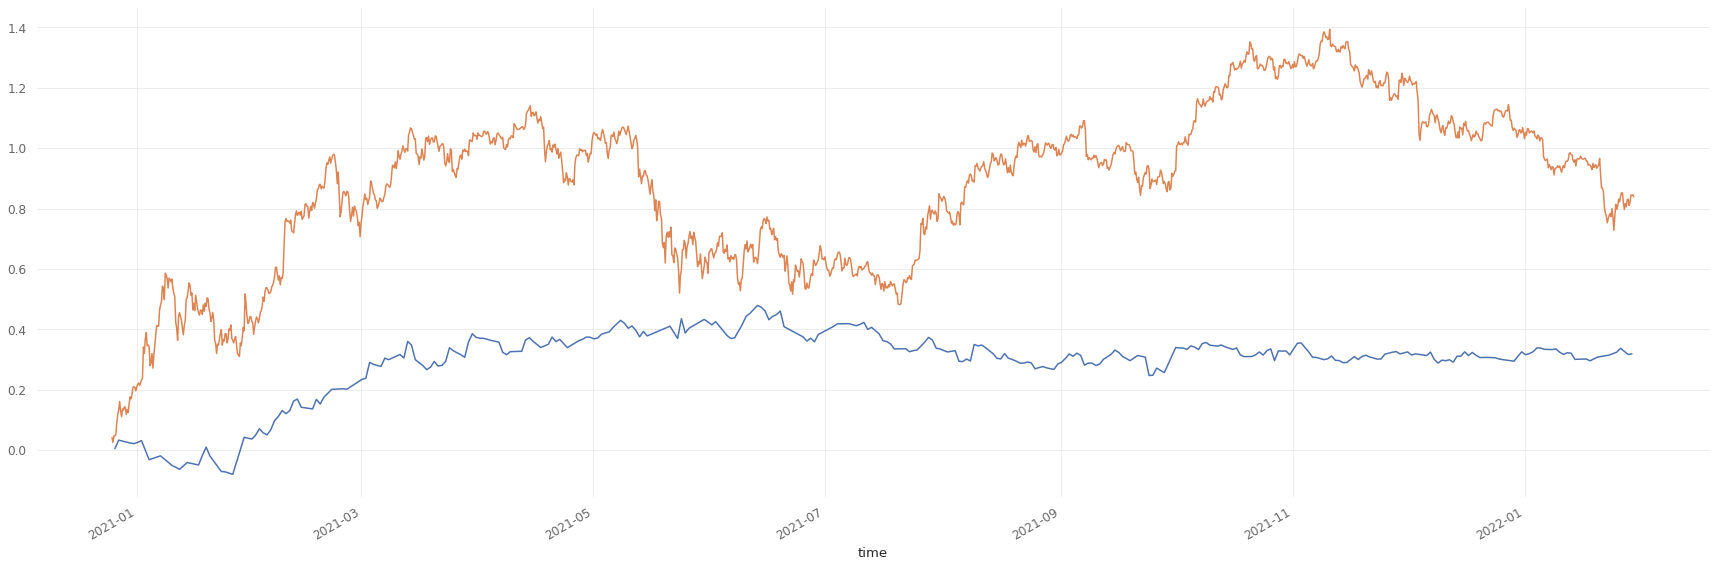

In [24]:
data.query('hour==6 & cuts_price==2')[
    'expected_chg_1'].cumsum().plot(figsize=(30, 5))
data['chg'].cumsum().plot(figsize=(30, 10))  # secondary_y=True


In [25]:
pf_kwargs = dict(size=np.inf, fees=0)
data['entries_long'] = np.where(
    (data['cuts_price'] == 2) & (data['hour'] == 6),
    True, False)
data['exits_long'] = np.where(
    data['entries_long'].shift(1) == True, True, False)
pf = vbt.Portfolio.from_signals(
    data['close'],
    data['entries_long'],
    data['exits_long'],
    **pf_kwargs
)
pf.plot().show()


In [26]:
def test_cases(data, case, signal, lag, plot=False):
    pf_kwargs = dict(size=np.inf, fees=0.001)
    data['entries_long'] = np.where(data[case] == signal, True, False)
    data['exits_long'] = np.where(
        data['entries_long'].shift(lag) == True, True, False)
    pf = vbt.Portfolio.from_signals(
        data['close'],
        data['entries_long'],
        data['exits_long'],
        **pf_kwargs
    )
    if plot:
        pf.plot().show()
    return pf.returns_stats()


### Event


In [28]:
stat = data\
    .groupby('hour')\
    .apply(test_cases, case='cuts_price', signal=2, lag=6)\
    .unstack('hour')
stat


hour,0,1,4,6,12,18
Alpha,0.179545,NaN,NaN,NaN,-0.131183,-0.355386
Annualized Return [%],42.492354,NaN,NaN,NaN,7.029776,-17.873343
Annualized Volatility [%],55.808813,NaN,NaN,NaN,62.026805,66.389976
Benchmark Return [%],52.621571,0.0,0.0,59.554934,53.558459,54.924124
Beta,0.493801,NaN,NaN,0.571966,0.533932,0.6089
Calmar Ratio,0.85431,NaN,NaN,NaN,0.127685,-0.317282
Common Sense Ratio,1.603485,NaN,NaN,NaN,1.147476,0.840455
End,2022-01-29 00:00:00,2021-08-13 01:59:59.001000,2021-04-25 04:00:58.147000,2022-01-29 06:00:00,2022-01-29 12:00:00,2022-01-29 18:00:00
Kurtosis,4.019182,NaN,NaN,8.540646,7.453044,4.606312
Max Drawdown Duration,290 days 00:00:00,NaN,NaN,319.0,129 days 00:00:00,277 days 00:00:00
